In [2]:
import topostats as topo
from topostats import filters
from topostats import io
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import logging
LOGGER = logging.getLogger()
from skimage.segmentation import watershed
from skimage.feature import peak_local_max
from skimage import feature
import skimage.filters
import skimage.measure
import skimage.morphology
import skimage.color
import cv2
import scipy.ndimage as ndimage
import seaborn as sns
import yaml

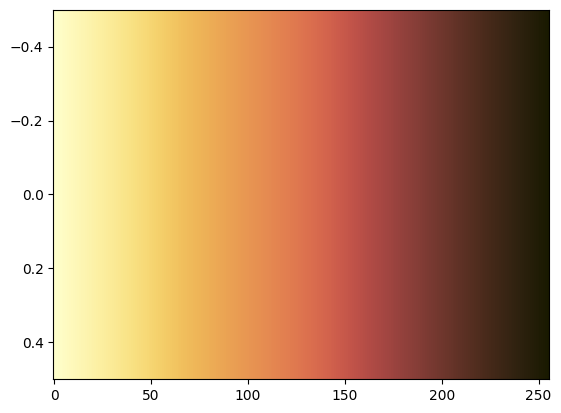

In [3]:
# Create the lajolla colour map
from matplotlib.colors import LinearSegmentedColormap      
      
cm_data = [[0.99983, 0.99974, 0.79991],      
           [0.99953, 0.99725, 0.79292],      
           [0.99921, 0.99476, 0.78593],      
           [0.99887, 0.99226, 0.77894],      
           [0.99851, 0.98977, 0.77195],      
           [0.99814, 0.98727, 0.76497],      
           [0.99775, 0.98476, 0.75798],      
           [0.99735, 0.98225, 0.75099],      
           [0.99693, 0.97973, 0.74399],      
           [0.9965, 0.97721, 0.73699],      
           [0.99606, 0.97467, 0.73],      
           [0.9956, 0.97213, 0.72299],      
           [0.99512, 0.96958, 0.71599],      
           [0.99464, 0.96701, 0.70898],      
           [0.99414, 0.96443, 0.70195],      
           [0.99363, 0.96183, 0.69492],      
           [0.9931, 0.95921, 0.68789],      
           [0.99256, 0.95657, 0.68085],      
           [0.99201, 0.95391, 0.6738],      
           [0.99145, 0.95123, 0.66674],      
           [0.99087, 0.94851, 0.65967],      
           [0.99028, 0.94576, 0.65258],      
           [0.98967, 0.94298, 0.64549],      
           [0.98905, 0.94017, 0.63838],      
           [0.98842, 0.93731, 0.63126],      
           [0.98777, 0.9344, 0.62413],      
           [0.98711, 0.93145, 0.61698],      
           [0.98643, 0.92845, 0.60981],      
           [0.98573, 0.92539, 0.60264],      
           [0.98502, 0.92228, 0.59545],      
           [0.9843, 0.91909, 0.58824],      
           [0.98354, 0.91584, 0.58103],      
           [0.98278, 0.91253, 0.57381],      
           [0.982, 0.90913, 0.56658],      
           [0.98119, 0.90566, 0.55934],      
           [0.98036, 0.90211, 0.55211],      
           [0.97951, 0.89846, 0.54486],      
           [0.97864, 0.89474, 0.53764],      
           [0.97775, 0.89091, 0.53041],      
           [0.97683, 0.887, 0.52321],      
           [0.97589, 0.88298, 0.51602],      
           [0.97493, 0.87887, 0.50888],      
           [0.97394, 0.87466, 0.50176],      
           [0.97294, 0.87036, 0.4947],      
           [0.9719, 0.86595, 0.48769],      
           [0.97084, 0.86145, 0.48073],      
           [0.96976, 0.85685, 0.47387],      
           [0.96866, 0.85217, 0.4671],      
           [0.96754, 0.84738, 0.4604],      
           [0.96639, 0.84253, 0.45384],      
           [0.96523, 0.83758, 0.44738],      
           [0.96405, 0.83256, 0.44107],      
           [0.96286, 0.82747, 0.4349],      
           [0.96165, 0.82232, 0.42887],      
           [0.96044, 0.81711, 0.42301],      
           [0.95921, 0.81186, 0.41734],      
           [0.95797, 0.80656, 0.41183],      
           [0.95673, 0.80123, 0.40651],      
           [0.95548, 0.79587, 0.40139],      
           [0.95423, 0.79049, 0.39647],      
           [0.95298, 0.7851, 0.39176],      
           [0.95173, 0.7797, 0.38724],      
           [0.95049, 0.7743, 0.38296],      
           [0.94925, 0.76891, 0.37886],      
           [0.94802, 0.76354, 0.37498],      
           [0.9468, 0.75818, 0.37129],      
           [0.94558, 0.75284, 0.36782],      
           [0.94438, 0.74753, 0.36455],      
           [0.94319, 0.74225, 0.36147],      
           [0.942, 0.73699, 0.35857],      
           [0.94083, 0.73178, 0.35587],      
           [0.93968, 0.72659, 0.35332],      
           [0.93853, 0.72144, 0.35096],      
           [0.9374, 0.71634, 0.34874],      
           [0.93628, 0.71126, 0.34667],      
           [0.93517, 0.70623, 0.34475],      
           [0.93407, 0.70122, 0.34297],      
           [0.93299, 0.69626, 0.3413],      
           [0.93191, 0.69133, 0.33977],      
           [0.93086, 0.68644, 0.33832],      
           [0.9298, 0.68157, 0.33699],      
           [0.92876, 0.67675, 0.33575],      
           [0.92773, 0.67194, 0.33461],      
           [0.9267, 0.66716, 0.33354],      
           [0.92569, 0.66242, 0.33255],      
           [0.92468, 0.65769, 0.3316],      
           [0.92368, 0.65297, 0.33073],      
           [0.92268, 0.64829, 0.32993],      
           [0.92169, 0.64362, 0.32917],      
           [0.92069, 0.63897, 0.32845],      
           [0.91971, 0.63434, 0.32777],      
           [0.91872, 0.6297, 0.32713],      
           [0.91775, 0.62509, 0.32653],      
           [0.91676, 0.62049, 0.32595],      
           [0.91577, 0.61589, 0.32541],      
           [0.9148, 0.61131, 0.32489],      
           [0.91381, 0.60672, 0.32439],      
           [0.91282, 0.60214, 0.32391],      
           [0.91183, 0.59757, 0.32345],      
           [0.91084, 0.59299, 0.32301],      
           [0.90983, 0.58841, 0.32257],      
           [0.90882, 0.58384, 0.32214],      
           [0.90781, 0.57926, 0.32172],      
           [0.90677, 0.57467, 0.32131],      
           [0.90574, 0.57009, 0.32091],      
           [0.90468, 0.5655, 0.32052],      
           [0.90361, 0.5609, 0.32013],      
           [0.90252, 0.5563, 0.31973],      
           [0.90141, 0.55169, 0.31934],      
           [0.90028, 0.54706, 0.31895],      
           [0.89913, 0.54243, 0.31856],      
           [0.89794, 0.53779, 0.31817],      
           [0.89674, 0.53312, 0.31778],      
           [0.89549, 0.52845, 0.31739],      
           [0.89421, 0.52375, 0.31699],      
           [0.89288, 0.51905, 0.3166],      
           [0.89151, 0.51432, 0.3162],      
           [0.89009, 0.50957, 0.31579],      
           [0.88862, 0.50481, 0.31537],      
           [0.88709, 0.50001, 0.31494],      
           [0.88549, 0.4952, 0.31451],      
           [0.88383, 0.49037, 0.31408],      
           [0.88209, 0.4855, 0.31363],      
           [0.88027, 0.48062, 0.31317],      
           [0.87836, 0.47572, 0.31269],      
           [0.87636, 0.47078, 0.31219],      
           [0.87426, 0.46581, 0.3117],      
           [0.87206, 0.46083, 0.3112],      
           [0.86973, 0.45582, 0.31068],      
           [0.86729, 0.45079, 0.31013],      
           [0.86473, 0.44572, 0.30956],      
           [0.86203, 0.44064, 0.30897],      
           [0.85918, 0.43556, 0.30835],      
           [0.8562, 0.43044, 0.3077],      
           [0.85306, 0.42531, 0.30705],      
           [0.84977, 0.42017, 0.30638],      
           [0.8463, 0.41502, 0.30567],      
           [0.84268, 0.40989, 0.30492],      
           [0.83888, 0.40473, 0.30415],      
           [0.83492, 0.3996, 0.30334],      
           [0.83077, 0.3945, 0.30251],      
           [0.82645, 0.38942, 0.30164],      
           [0.82195, 0.38436, 0.30075],      
           [0.81728, 0.37934, 0.29982],      
           [0.81242, 0.37438, 0.29885],      
           [0.80741, 0.36945, 0.29783],      
           [0.80221, 0.36459, 0.2968],      
           [0.79686, 0.35981, 0.2957],      
           [0.79135, 0.35512, 0.29457],      
           [0.78568, 0.35049, 0.29341],      
           [0.77987, 0.34593, 0.29222],      
           [0.77392, 0.34151, 0.29098],      
           [0.76784, 0.33718, 0.28969],      
           [0.76164, 0.33295, 0.28837],      
           [0.75533, 0.32883, 0.28699],      
           [0.74891, 0.32481, 0.28559],      
           [0.7424, 0.32094, 0.28415],      
           [0.7358, 0.31716, 0.28268],      
           [0.72913, 0.31351, 0.28113],      
           [0.72238, 0.30998, 0.27958],      
           [0.71559, 0.30656, 0.27796],      
           [0.70873, 0.30323, 0.27631],      
           [0.70182, 0.30005, 0.2746],      
           [0.69488, 0.29697, 0.27286],      
           [0.68791, 0.29396, 0.27108],      
           [0.68091, 0.29108, 0.26927],      
           [0.67389, 0.28828, 0.26736],      
           [0.66685, 0.28556, 0.26546],      
           [0.6598, 0.28295, 0.26352],      
           [0.65273, 0.28037, 0.26149],      
           [0.64566, 0.27791, 0.25945],      
           [0.63859, 0.2755, 0.25734],      
           [0.63151, 0.27312, 0.25521],      
           [0.62444, 0.27082, 0.253],      
           [0.61736, 0.26855, 0.25076],      
           [0.61029, 0.26633, 0.24848],      
           [0.60322, 0.26415, 0.24612],      
           [0.59616, 0.26199, 0.24373],      
           [0.58909, 0.25987, 0.24132],      
           [0.58204, 0.25775, 0.23883],      
           [0.575, 0.25567, 0.23633],      
           [0.56797, 0.2536, 0.23373],      
           [0.56093, 0.25155, 0.23114],      
           [0.55391, 0.24948, 0.22849],      
           [0.5469, 0.24745, 0.22578],      
           [0.53989, 0.2454, 0.22304],      
           [0.53291, 0.24336, 0.22025],      
           [0.52592, 0.24134, 0.21742],      
           [0.51895, 0.2393, 0.21455],      
           [0.51198, 0.23728, 0.21167],      
           [0.50503, 0.23523, 0.20871],      
           [0.49809, 0.23315, 0.20576],      
           [0.49117, 0.23112, 0.20274],      
           [0.48423, 0.22906, 0.1997],      
           [0.47733, 0.227, 0.19669],      
           [0.47045, 0.2249, 0.1936],      
           [0.46356, 0.22286, 0.19048],      
           [0.4567, 0.22079, 0.18738],      
           [0.44986, 0.21868, 0.18422],      
           [0.44303, 0.2166, 0.18105],      
           [0.43621, 0.21449, 0.17792],      
           [0.42941, 0.2124, 0.17473],      
           [0.42262, 0.21028, 0.17151],      
           [0.41587, 0.20818, 0.16831],      
           [0.40912, 0.20608, 0.16509],      
           [0.40239, 0.20397, 0.16193],      
           [0.39569, 0.20182, 0.15872],      
           [0.389, 0.1997, 0.1555],      
           [0.38233, 0.1976, 0.15228],      
           [0.37568, 0.19547, 0.1491],      
           [0.36906, 0.19337, 0.14593],      
           [0.36245, 0.19124, 0.14274],      
           [0.35588, 0.18913, 0.13954],      
           [0.34931, 0.18702, 0.13639],      
           [0.34278, 0.18492, 0.13329],      
           [0.33625, 0.18278, 0.13021],      
           [0.32977, 0.18068, 0.12705],      
           [0.32329, 0.17861, 0.12397],      
           [0.31684, 0.17648, 0.12091],      
           [0.31043, 0.17441, 0.11793],      
           [0.30401, 0.17231, 0.11488],      
           [0.29764, 0.17023, 0.11196],      
           [0.2913, 0.16814, 0.109],      
           [0.28496, 0.16607, 0.1061],      
           [0.27867, 0.16404, 0.10321],      
           [0.27237, 0.16197, 0.10032],      
           [0.26614, 0.15986, 0.09752],      
           [0.25991, 0.15783, 0.094764],      
           [0.25371, 0.1558, 0.092001],      
           [0.24753, 0.15373, 0.08926],      
           [0.24138, 0.1517, 0.086567],      
           [0.23526, 0.1497, 0.083951],      
           [0.22914, 0.14766, 0.081329],      
           [0.22307, 0.14566, 0.078687],      
           [0.21702, 0.14362, 0.07612],      
           [0.211, 0.14161, 0.073581],      
           [0.20503, 0.13954, 0.070837],      
           [0.19909, 0.13759, 0.068084],      
           [0.19322, 0.13553, 0.065213],      
           [0.1874, 0.13354, 0.062323],      
           [0.18156, 0.13153, 0.059337],      
           [0.1758, 0.12951, 0.056198],      
           [0.17011, 0.12748, 0.052899],      
           [0.16445, 0.12548, 0.04964],      
           [0.15883, 0.12342, 0.046062],      
           [0.15323, 0.12139, 0.042482],      
           [0.14773, 0.1194, 0.038691],      
           [0.14225, 0.11735, 0.03474],      
           [0.13682, 0.11532, 0.030784],      
           [0.13146, 0.11332, 0.026943],      
           [0.12616, 0.11125, 0.02311],      
           [0.12086, 0.1092, 0.019283],      
           [0.1157, 0.10713, 0.01546],      
           [0.11058, 0.10499, 0.011622],      
           [0.10549, 0.10296, 0.0076238],      
           [0.10023, 0.10091, 0.0037913]]      
      
lajolla_map = LinearSegmentedColormap.from_list('lajolla', cm_data)      
# For use of "viscm view"      
test_cm = lajolla_map 
      
if __name__ == "__main__":      
    import matplotlib.pyplot as plt      
    import numpy as np                     
    plt.imshow(np.linspace(0, 100, 256)[None, :], aspect='auto',      
                cmap=lajolla_map)      
    plt.show() 

## Define useful functions

In [4]:
def plane_tilt_removal(image: np.ndarray):
    read_matrix = image.copy()
    # Line of best fit
    # Calculate medians
    medians_x = [np.nanmedian(read_matrix[:, i]) for i in range(read_matrix.shape[1])]
    medians_y = [np.nanmedian(read_matrix[j, :]) for j in range(read_matrix.shape[0])]

    # Fit linear x
    px = np.polyfit(range(0, len(medians_x)), medians_x, 1)
    LOGGER.info(f"x-polyfit 1st order: {px}")
    py = np.polyfit(range(0, len(medians_y)), medians_y, 1)
    LOGGER.info(f"y-polyfit 1st order: {py}")

    if px[0] != 0:
        if not np.isnan(px[0]):
            LOGGER.info(f"Removing x plane tilt")
            for row in range(0, image.shape[0]):
                for col in range(0, image.shape[1]):
                    image[row, col] -= px[0] * (col)
        else:
            LOGGER.info(f"x gradient is nan, skipping plane tilt x removal")
    else:
        LOGGER.info("x gradient is zero, skipping plane tilt x removal")

    if py[0] != 0:
        if not np.isnan(py[0]):
            LOGGER.info(f"removing y plane tilt")
            for row in range(0, image.shape[0]):
                for col in range(0, image.shape[1]):
                    image[row, col] -= py[0] * (row)
        else:
            LOGGER.info("y gradient is nan, skipping plane tilt y removal")
    else:
        LOGGER.info("y gradient is zero, skipping plane tilt y removal")

    return image

def remove_polynomial(image: np.ndarray, mask: np.ndarray = None, order: int=2):
        image = image.copy()
        if mask is not None:
            read_matrix = np.ma.masked_array(image, mask=mask, fill_value=np.nan).filled()
        else:
            read_matrix = image

        # Calculate the median over the horizontal direction. (axis=0 since that's the dimension in which the median is taken for each
        # element of the median array)
        col_medians = np.nanmedian(read_matrix, axis=0) 

        # Fit the row median data to a polynomial
        coeffs = np.polyfit(range(0, read_matrix.shape[1]), col_medians, order)
        LOGGER.info(f"x polyfit nth order: {coeffs}")
        row_fit = np.polyval(coeffs, range(0, read_matrix.shape[1]))

        for row in range(0, read_matrix.shape[0]):
            image[row, :] -= row_fit

        return image

def zero_average(heightmap: np.ndarray) -> np.ndarray:
    median = np.nanmedian(heightmap)
    return np.subtract(heightmap, median)

def scale_heightmap(heightmap):
    heightmap = heightmap.astype(np.float32)
    min_value = heightmap.min()
    max_value = heightmap.max()
    heightmap = (heightmap - min_value) / (max_value - min_value)
    heightmap = heightmap * 255
    heightmap = heightmap.astype(np.uint8)
    return heightmap

def plot(img, title='', savepath=None):
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.imshow(img, cmap=lajolla_map)
    ax.set_title(title)
    if savepath is not None:
        fig.savefig(savepath)
    plt.show()

def plot_with_means(img: np.ndarray, title: str=''):
    fig, ax = plt.subplots(1, 3, figsize=(10, 4))
    ax[0].imshow(img, cmap=lajolla_map)
    ax[0].set_title('image')
    ax[1].plot(np.nanmedian(img, axis=0), '.')
    ax[1].set_title('axis: 0')
    ax[2].plot(np.nanmedian(img, axis=1), '.')
    ax[2].set_title('axis: 1')
    fig.suptitle(title)
    fig.tight_layout()
    plt.show()

# Load file

filename: AR124_927B_FACsPbI3_evap_5um_.0_00003
[Mon, 13 Mar 2023 19:04:50] [INFO    ] [topostats] Extracting image from new_data/AR124_927B_FACsPbI3_evap_5um_.0_00003.spm
[Mon, 13 Mar 2023 19:04:50] [INFO    ] [topostats] Loading image from : new_data/AR124_927B_FACsPbI3_evap_5um_.0_00003.spm
[Mon, 13 Mar 2023 19:04:50] [INFO    ] [topostats] [AR124_927B_FACsPbI3_evap_5um_.0_00003] : Loaded image from : new_data/AR124_927B_FACsPbI3_evap_5um_.0_00003.spm
[Mon, 13 Mar 2023 19:04:50] [INFO    ] [topostats] [AR124_927B_FACsPbI3_evap_5um_.0_00003] : Extracted channel Height
[Mon, 13 Mar 2023 19:04:50] [INFO    ] [topostats] [AR124_927B_FACsPbI3_evap_5um_.0_00003] : Pixel to nm scaling : 9.765625
[Mon, 13 Mar 2023 19:04:50] [INFO    ] [topostats] Loading image from : new_data/AR124_927B_FACsPbI3_evap_5um_.0_00003.spm
[Mon, 13 Mar 2023 19:04:50] [INFO    ] [topostats] [AR124_927B_FACsPbI3_evap_5um_.0_00003] : Loaded image from : new_data/AR124_927B_FACsPbI3_evap_5um_.0_00003.spm
[Mon, 13 Mar

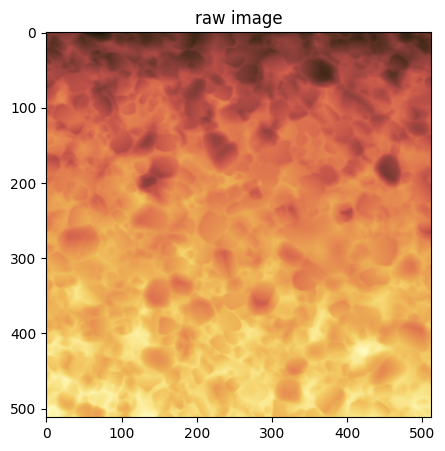

In [45]:
# file = Path('./perovskite/20230207_Me4_NPs_perov_10um.0_00007.spm')
file = Path('./new_data/AR124_927B_FACsPbI3_evap_5um_.0_00003.spm')
filename = file.stem
output_dir = Path('./output/') / filename
Path.mkdir(output_dir, exist_ok=True)
print(f'filename: {filename}')
# loadscan = io.LoadScans(img_paths = [file], channel='ZSensorRetrace')
loadscan = io.LoadScans(img_paths = [file], channel='Height')
loadscan.get_data()
# data, pixel_to_nm = loadscan.load_ibw()
data, pixel_to_nm = loadscan.load_spm()

plot(data, title='raw image', savepath=output_dir/'raw_image.png')

# Flatten

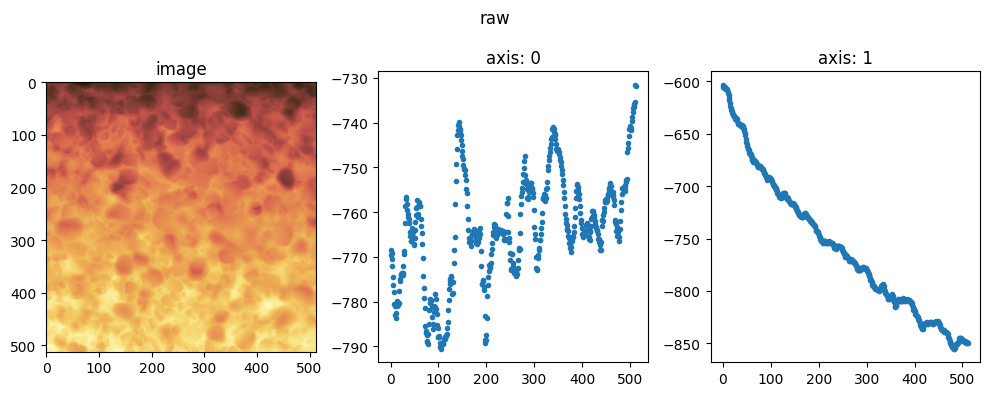

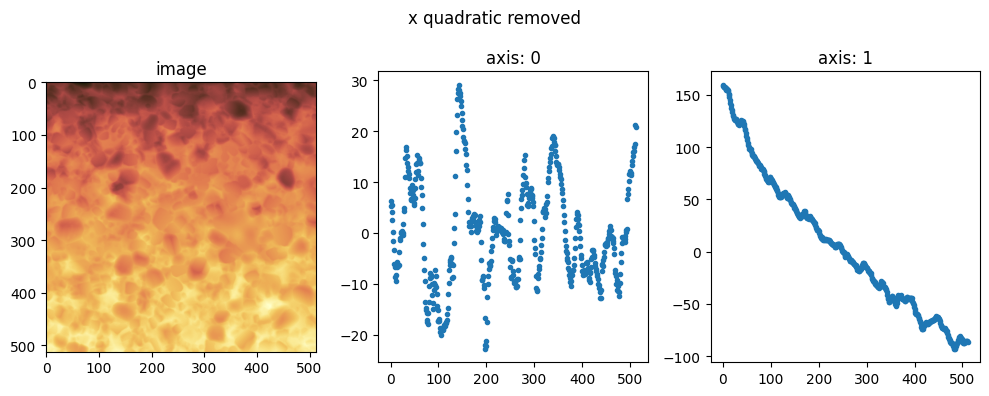

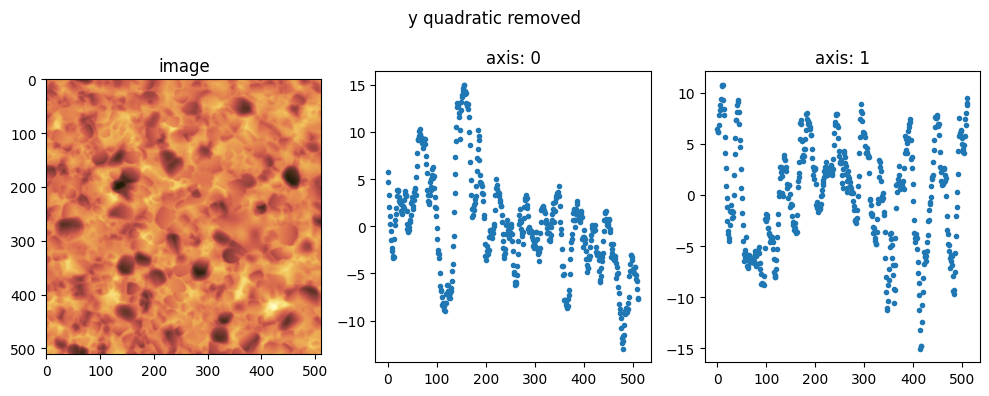

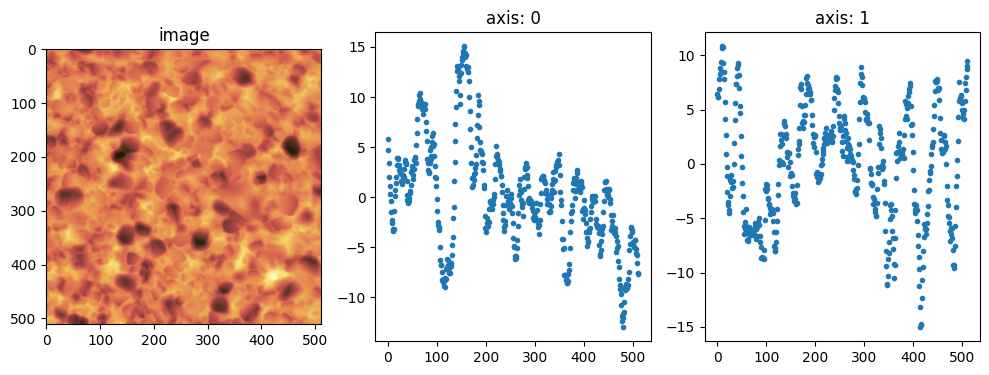

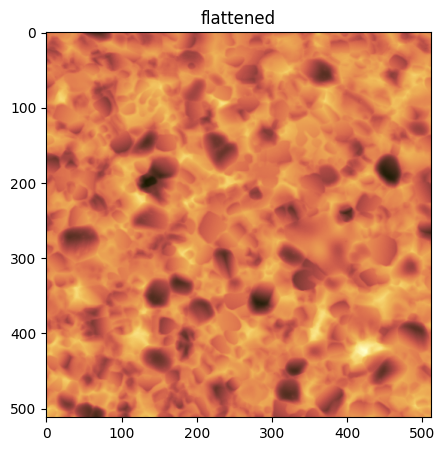

In [46]:
#  Flatten image
img = data.copy()
plot_with_means(img, title='raw')
img = remove_polynomial(img, order=3)
plot_with_means(img, title='x quadratic removed')
img = remove_polynomial(img.T, order=3).T
plot_with_means(img, title='y quadratic removed')
img = zero_average(img)
plot_with_means(img)

flattened = img.copy()

plot(flattened, title='flattened', savepath=output_dir/'flattened.png')

# Roughness

In [47]:
# Calculate roughness
def roughness_rms(heightmap: np.ndarray) -> float:
    rms = np.sqrt(np.mean((heightmap*1e-9)**2))
    return rms

roughness = roughness_rms(flattened)
print(roughness)

2.5274960329804868e-08


# Segment

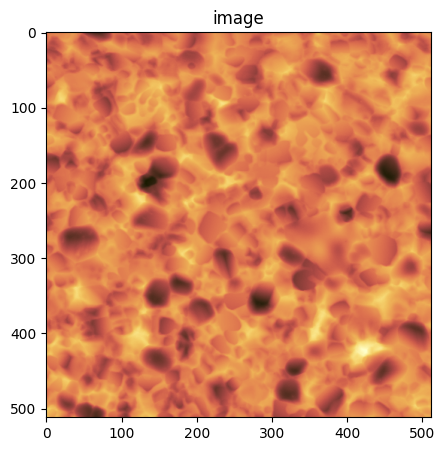

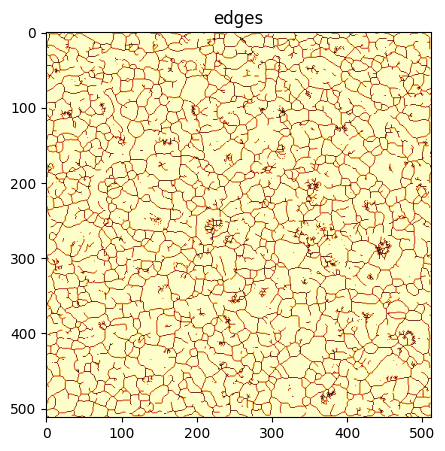

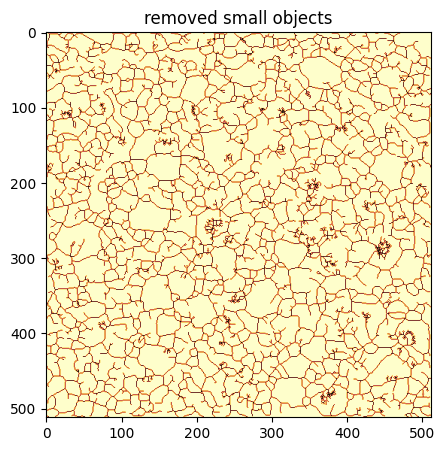

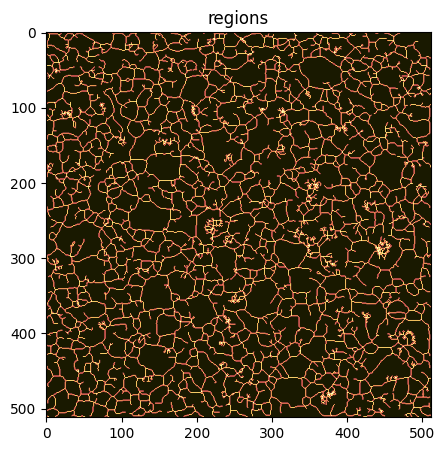

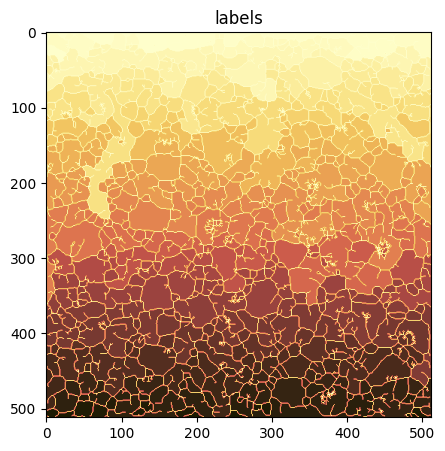

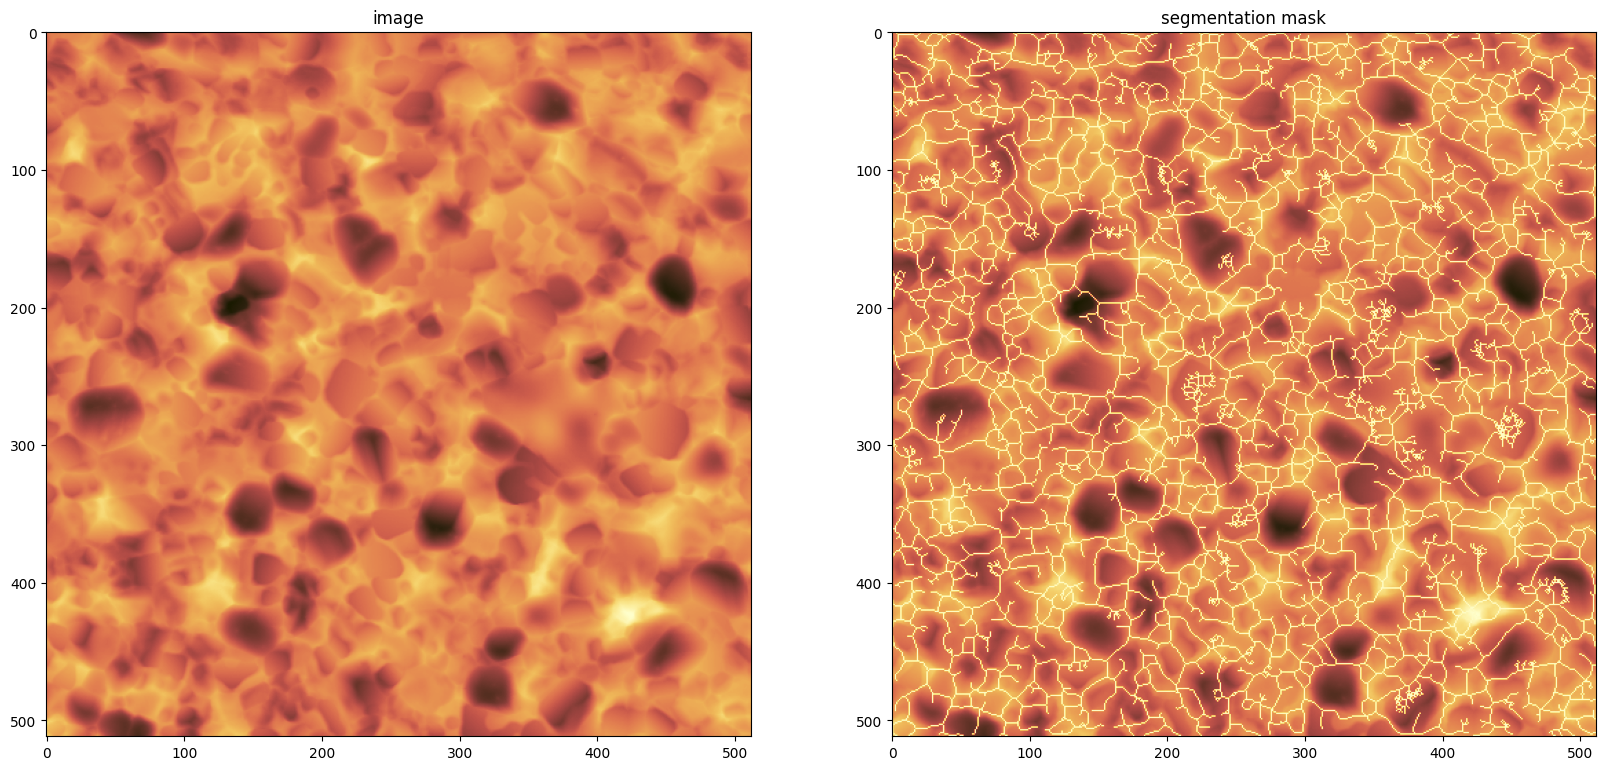

mean area: 217.90462962962962


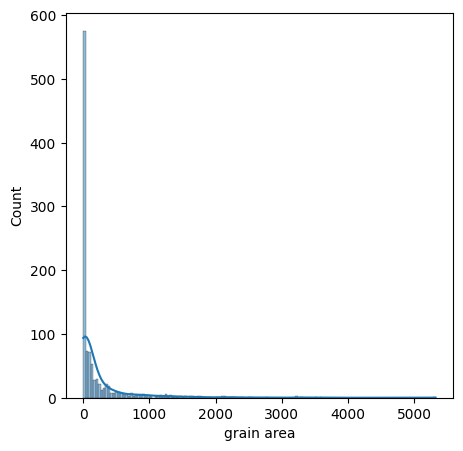

In [48]:
img = flattened.copy()
# Scale the heightmap to [0, 255]
img = scale_heightmap(img)
plot(img, 'image')
img4 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 21, 0)
img5 = skimage.img_as_ubyte(skimage.morphology.skeletonize(skimage.img_as_bool(img4)))
img6 = cv2.dilate(img5, cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3)), iterations=1)
edges = (img5 != 0)
plot(edges, 'edges')
edges = skimage.morphology.remove_small_objects(edges.astype(bool),connectivity=8 ,min_size=100)
plot(edges, title='removed small objects', savepath=output_dir/'edges.png')
masked_img = np.ma.masked_array(img, edges, fill_value=5).filled()

regions = np.invert(edges)
plot(regions, title='regions', savepath=output_dir/'regions.png')

labels = skimage.measure.label(regions, connectivity=1)
plot(labels, title='labels', savepath=output_dir/'labels.png')

areas = []
for props_index, props in enumerate(skimage.measure.regionprops(labels)):
    if props.label != 0:
        areas.append(props.area)
mean_area = np.mean(areas)
number_of_grains = len(labels) - 1

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(img, cmap=lajolla_map)
ax[0].set_title('image')
ax[1].imshow(masked_img, cmap=lajolla_map)
ax[1].set_title('segmentation mask')
fig.savefig(output_dir / 'segmentation.png')
plt.show()

print(f'mean area: {mean_area}')
fig, ax = plt.subplots(figsize=(5, 5))
sns.histplot(areas, ax=ax, kde=True)
ax.set_xlabel('grain area')
fig.savefig(output_dir / 'area_histogram.png')
plt.show()

# Write stats to file
data = {
    'roughness': float(roughness),
    'mean_grain_area': float(mean_area),
    'number_of_grains': int(number_of_grains)
}
with open(output_dir / 'stats.yaml', 'w') as y:
    yaml.dump(data, y)

# Convolutional segmentation

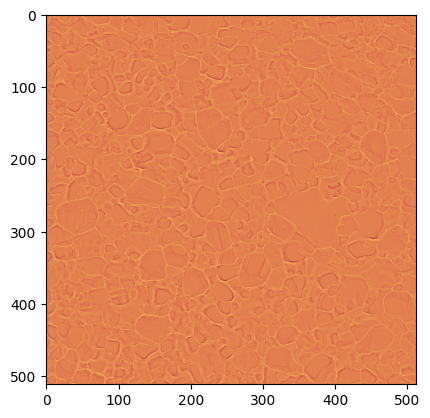

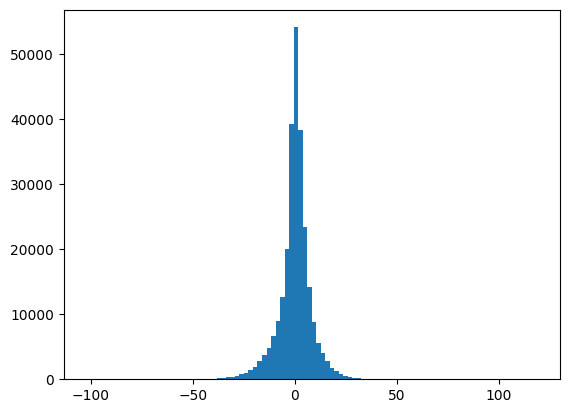

-4.317000598093379


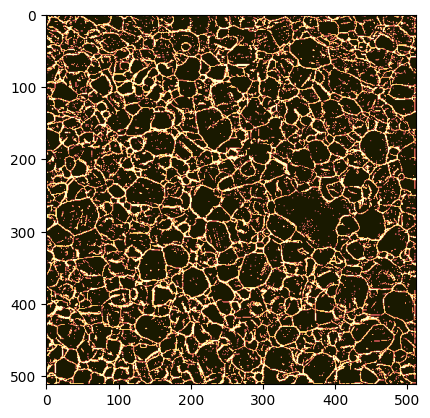

In [72]:
from scipy.ndimage import convolve
from skimage.filters import threshold_otsu

kernel = np.array(
    [
        [-1, -1, -1],
        [-1,  8, -1],
        [-1, -1, -1]
    ]
)

img = flattened.copy()

convolved = convolve(img, weights=kernel)
plt.imshow(convolved, cmap=lajolla_map)
plt.show()

plt.hist(convolved.flatten(), bins=100)
plt.show()

threshold = threshold_otsu(convolved)
print(threshold)
plt.show()
plt.imshow(convolved > threshold, cmap=lajolla_map)

# Experimental section

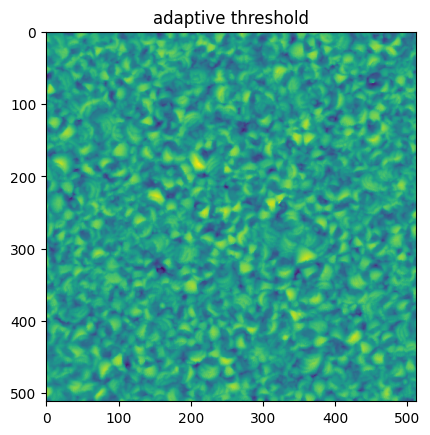

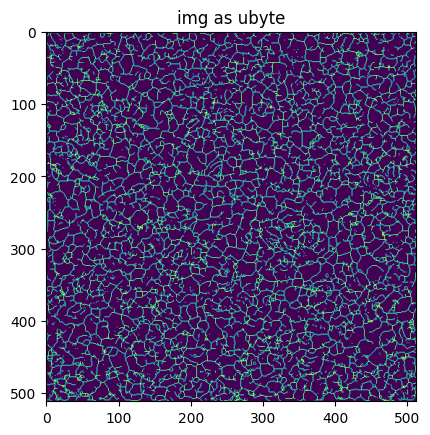

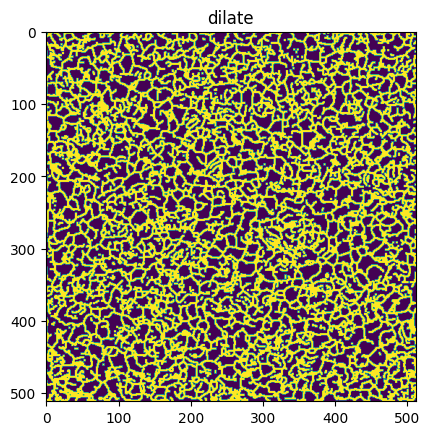

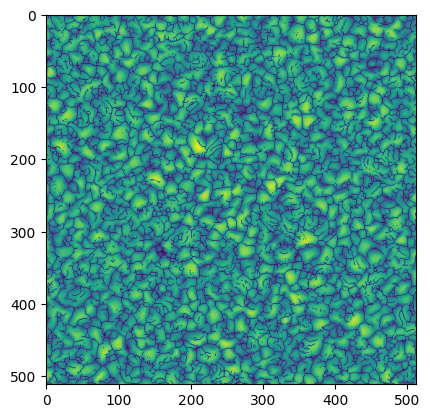

In [81]:
# img2 = cv2.medianBlur(img, 5)
# plot(img2, 'blur')
# img3 = cv2.bilateralFilter(img2, 9, 75, 75)
# plot(img3, 'bilateral filter')
img4 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 15, 0)
plot(img, 'adaptive threshold')
img5 = skimage.img_as_ubyte(skimage.morphology.skeletonize(skimage.img_as_bool(img4)))
plot(img5, 'img as ubyte')
img6 = cv2.dilate(img5, cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3)), iterations=1)
plot(img6, 'dilate')

edges = (img5 != 0)
masked_img = np.ma.masked_array(img, img5!=0, fill_value=5).filled()
plt.imshow(masked_img)
plt.show()

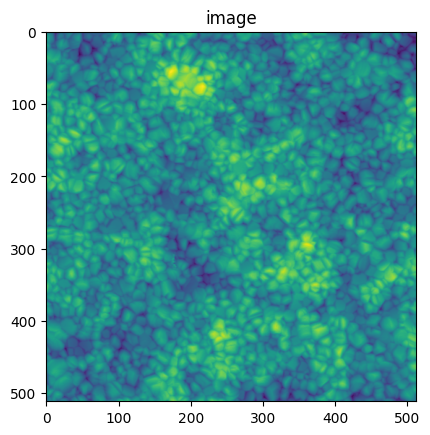

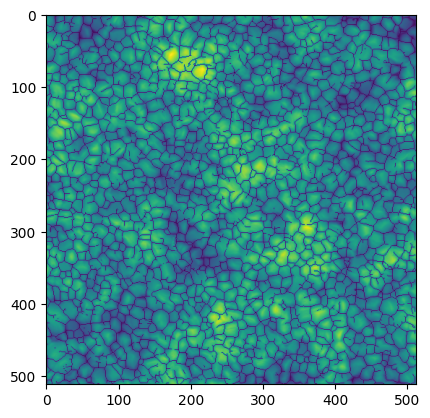

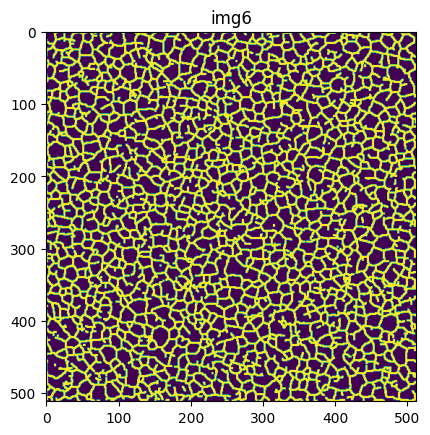

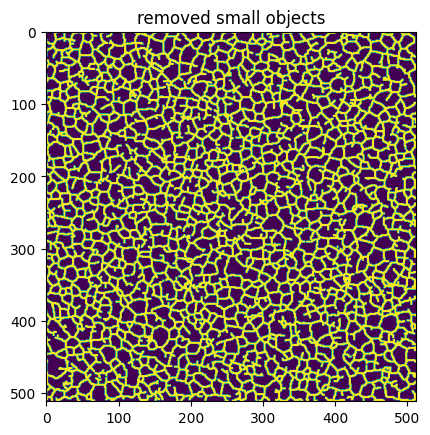

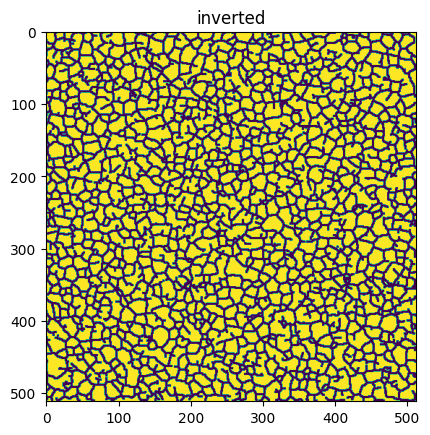

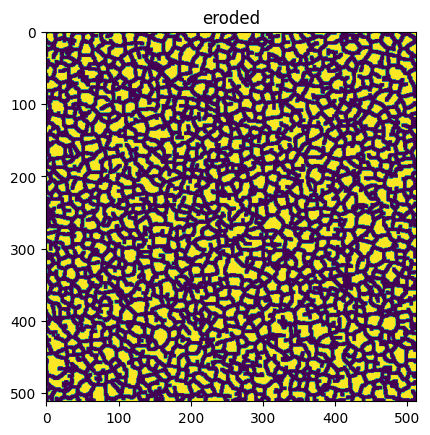

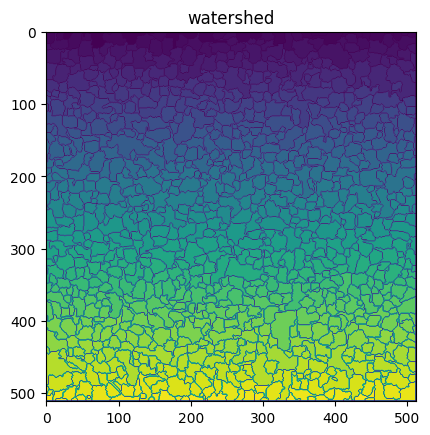

In [6]:
img = data.copy()
img = plane_tilt_removal(img)
img = scale_heightmap(img)
plot(img, 'image')
img4 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 27, 0)
img5 = skimage.img_as_ubyte(skimage.morphology.skeletonize(skimage.img_as_bool(img4)))
img6 = cv2.dilate(img5, cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3)), iterations=1)
edges = (img5 != 0)
masked_img = np.ma.masked_array(img, edges, fill_value=5).filled()
plt.imshow(masked_img)
plt.show()

plot(img6, 'img6')

removed_small_objects = skimage.morphology.remove_small_objects(img6.astype(bool), min_size=100)
plot(removed_small_objects, 'removed small objects')

inverted = np.invert(removed_small_objects)
# inverted = cv2.erode(inverted)
plot(inverted, 'inverted')

# eroded = skimage.morphology.binary_erosion(inverted)
eroded = cv2.erode(inverted.astype(np.uint8), kernel=np.ones((3,3),np.uint8), iterations=1)
plot(eroded, 'eroded')

ret, markers = cv2.connectedComponents(np.uint8(eroded))

watershed = cv2.watershed(cv2.cvtColor(img, cv2.COLOR_GRAY2BGR), markers.astype(np.int32))
plot(watershed, 'watershed')

# sure_bg = np.invert(img5)
# plot(sure_bg, 'sure_background')

# kernel = np.ones((3,3),np.uint8)
# sure_fg = cv2.erode(sure_bg, kernel, iterations=1)
# sure_fg = cv2.morphologyEx(sure_fg, cv2.MORPH_CLOSE, kernel)

# dist_transform = cv2.distanceTransform(sure_bg, cv2.DIST_L2, 5)
# plot(dist_transform, 'distance transform')

# ret, sure_fg = cv2.threshold(dist_transform, 0.1*dist_transform.max(), 255, 0)
# plot(sure_fg, 'sure foreground')

# Find unknown region
# sure_fg = np.uint8(sure_fg)
# plot(sure_fg, 'sure foreground')
# unknown = cv2.subtract(sure_bg, sure_fg)
# plot(unknown, 'unknown')

# ret, markers = cv2.connectedComponents(sure_fg)
# plot(markers, 'markers')

# markers = markers + 1
# # markers[unknown==255] = 0
# markers = markers.astype(np.int32)

# Convert image to 3-channel colour
# img_3_channel = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
# plot(img_3_channel, 'img 3 channel')

# watershed_markers = cv2.watershed(img_3_channel, markers)
# plot(watershed_markers, 'watershed')

# fig, ax = plt.subplots(1, 2, figsize=(10,20))
# ax[0].imshow(img)
# ax[1].imshow(watershed_markers)
# plt.show()

# kernel = np.ones((3,3),np.uint8)
# opening = cv2.morphologyEx(inverted,cv2.MORPH_OPEN,kernel, iterations = 1)
# plot(opening, 'opening')

# sure_bg = cv2.dilate(opening, kernel, iterations=3)
# plot(sure_bg, 'sure_bg')

# inverted_edges = np.invert(edges)
# labelled = skimage.measure.label(inverted_edges, background=0, connectivity=1)

# num_labels, markers = cv2.connectedComponents(sure_bg, connectivity=4)
# plot(markers, 'labelled')

# labels_im = labels_im + 1

# watershed_markers = watershed = cv2.watershed(img, markers)
# plot(watershed_markers, 'watershed')


# plot(labelled[0:10, 0:10], 'labelled')
# print(labelled[0:10, 0:10])

# plot(labelled[440:450, 440:450], 'labelled')
# print(labelled[440:450, 440:450])

# print(inverted_edges)
# boolean_areas = (inverted_edges == 255).astype(int)
# print(boolean_areas)
# labels = cv2.connectedComponents(boolean_areas)
# print(labels)
# plot(labels[1])
